In [92]:
import sys
import pandas as pd
import numpy as np
import json
from PIL import Image
from matplotlib._png import read_png
import math
#from decimal import Decimcheck java versional
import collections
from operator import itemgetter

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from IPython.display import IFrame

sns.set_color_codes()
sns.set_style("white")

sys.path.append('/home/keith/nba/production')
from nba import nbaGame,nbaPlot
#reload(nbaGame)

In [93]:
with open('/nbaData/0021500491.json') as data_file:
    bata=json.load(data_file)

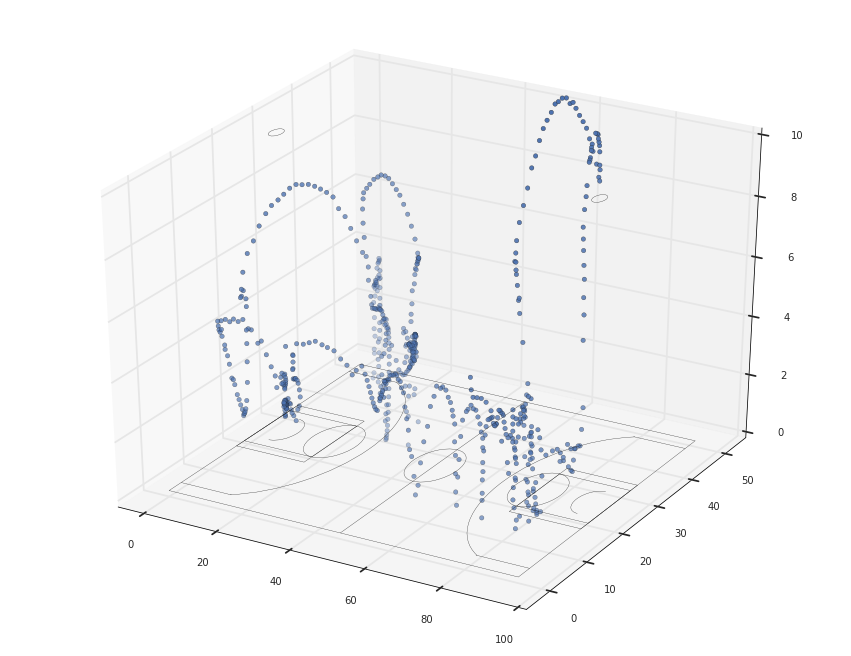

In [94]:
#2D plot

recievedPoss,tempPoss=testGame.getEvent(3)
if recievedPoss:
    poss3D=plt.figure(figsize=(15, 11.5)).gca(projection='3d')
    poss3D.scatter(tempPoss[(-1,'x')],tempPoss[(-1,'y')],tempPoss[(-1,'z')])
    nbaPlot.draw_court(poss3D)
    plt.show()

recieved


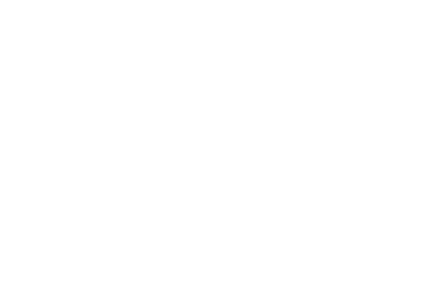

In [125]:
import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

N_trajectories=1
def lorentz_deriv((x, y, z), t0, sigma=10., beta=8./3, rho=28.0):
    """Compute the time-derivative of a Lorentz system."""
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]


# Choose random starting points, uniformly distributed from -15 to 15
np.random.seed(1)
x0 = -15 + 30 * np.random.random((N_trajectories, 3))

# Solve for the trajectories
t = np.linspace(0, 4, 1000)
x_t = np.asarray([integrate.odeint(lorentz_deriv, x0i, t)
                  for x0i in x0])


if recievedPoss:
    print 'recieved'
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('off')
    colors = plt.cm.jet(np.linspace(0, 1, 1))
    pts = [pt for c in colors for pt in ax.plot([], [], [], 'o', c=c)]
    lines = [pt for c in colors for pt in ax.plot([], [], [], '-', c=c)]
    #ax.set_xlim((-5, 100))
    #ax.set_ylim((-5, 55))
    #ax.set_zlim((0, 15))#fig = plt.figure()
    #fig.figsize=(15, 11.5)
    #ax = fig.add_subplot(111, projection='3d')
    #nbaPlot.draw_court(ax)
    #ax.view_init(30, 0)

    
# initialization function: plot the background of each frame
def init():
    for line, pt in zip(lines, pts):
        line.set_data([], [])
        line.set_3d_properties([])

        pt.set_data([], [])
        pt.set_3d_properties([])
    return lines + pts

def animate(i):
    for line, pt in zip(lines,pts):
        x=tempPoss[:i][[(-1,'x')]].values.T
        y=tempPoss[:i][[(-1,'y')]].values.T
        z=tempPoss[:i][[(-1,'z')]].values.T
        #x, y, z = xi[:i].T

        line.set_data(x,y)
        line.set_3d_properties(z)
        pt.set_data(x[-1:],y[-1:])
        pt.set_3d_properties(z[-1:])
    ax.view_init(30, 0.3 * i)
    fig.canvas.draw()
    return lines + pts


#anim=animation.FuncAnimation(fig,animate,init_func=init,frames=500,interval=30,blit=True)

anim = animation.FuncAnimation(fig, animate,init_func=init,frames=500, interval=30, blit=True)

#anim.save('basic_animation.mp4', fps=15,extra_args=['-vcodec', 'libx264'])
#print x
plt.show()

In [123]:
x=tempPoss[:][[(-1,'x')]].values.T
y=tempPoss[:][[(-1,'x')]].values
z=tempPoss[:][[(-1,'z')]].values

print x[:5]
        
        

[[ 75.32556  76.07296  76.81954  77.57706  78.24726  78.98622  79.75325
   80.55254  81.38831  82.26478  83.18615  84.15663  83.80734  83.45805
   83.39822  83.33839  83.27856  83.29258  83.10254  82.68494  83.26289
   83.20369  83.14449  83.14732  83.03427  83.15626  82.89856  83.34541
   83.29881  83.65626  84.01371  83.96587  84.01295  84.15464  84.17581
   84.18767  84.19137  84.71193  84.85412  84.54748  84.50003  84.83502
   85.1273   85.224    86.90898  86.12972  85.35045  84.98416  84.69513
   84.48398  84.40026  84.40149  84.41015  84.1418   84.09792  84.14827
   83.89885  83.6278   83.2002   82.78301  82.4311   82.12394  81.8262
   81.59263  81.1523   80.62298  80.17695  79.97729  79.67322  79.50366
   79.35194  79.31087  79.35266  79.42405  79.52564  79.65725  79.81868
   79.38112  79.15768  79.09506  79.28211  79.00854  78.82292  78.72287
   78.51639  78.66002  78.61569  78.64319  78.9648   79.42823  79.88086
   80.34863  80.78999  81.26009  81.63596  82.05407  82.5726   82